In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("D:/python/project 3/Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df = data.copy()

In [7]:
df['InvoiceNo'] = df['InvoiceNo'].astype('string')

In [8]:
df[['StockCode', 'Description', 'Country']] = df[['StockCode', 'Description', 'Country']].astype('string')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [10]:
na_ds = df[df['Description'].isna()]
na_ds['Quantity'].sum()

-13609

In [11]:
mostfreq = df.groupby('StockCode')['Description'].value_counts().reset_index()
mostfreq = mostfreq.sort_values(by='count', ascending=False)
mostfreq

,StockCode,Description,count
4221,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1554,22423,REGENCY CAKESTAND 3 TIER,2200
4197,85099B,JUMBO BAG RED RETROSPOT,2159
3295,47566,PARTY BUNTING,1727
210,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
3132,35954,counted,1
3131,35954,check,1
3126,35923,check,1
3117,35915C,damaged,1


In [12]:
mostfreq = mostfreq.groupby('StockCode').head(1)
mostfreq

,StockCode,Description,count
4221,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1554,22423,REGENCY CAKESTAND 3 TIER,2200
4197,85099B,JUMBO BAG RED RETROSPOT,2159
3295,47566,PARTY BUNTING,1727
210,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
3059,35600A,Found by jackie,1
3050,35597B,BLACKCHRISTMAS TREE 30CM,1
3101,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
3154,37330,BIG POLKADOT MUG,1


In [13]:
df2 = df.merge(mostfreq, on='StockCode', how='left')
df2

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [14]:
df2['Description_x'] = df2['Description_y']

In [15]:
df2.dropna(subset='Description_x', inplace=True)

In [16]:
df2.drop(columns=['Description_y', 'count'], inplace=True)

In [17]:
df2.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

In [18]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
df3 = df2[(df2['Quantity']>0) & (df2['UnitPrice']>0)]

In [20]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [21]:
df3['Total_Sales'] = df3['Quantity'] * df3['UnitPrice']
df3['Month'] = df3['InvoiceDate'].dt.month
df3['Short_Month'] = df3['InvoiceDate'].dt.strftime('%b')

C:\Users\gnikh\AppData\Local\Temp\ipykernel_9772\2892357290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total_Sales'] = df3['Quantity'] * df3['UnitPrice']
C:\Users\gnikh\AppData\Local\Temp\ipykernel_9772\2892357290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['InvoiceDate'].dt.month
C:\Users\gnikh\AppData\Local\Temp\ipykernel_9772\2892357290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [22]:
monthly_sales = df3.groupby(['Month', 'Short_Month'])['Total_Sales'].sum().reset_index()
monthsales = monthly_sales.drop(columns=['Month'])
monthsales

,Short_Month,Total_Sales
0,Jan,691364.560
1,Feb,523631.890
2,Mar,717639.360
3,Apr,537808.621
4,May,770536.020
5,Jun,761739.900
6,Jul,719221.191
7,Aug,759138.380
8,Sep,1058590.172
9,Oct,1154979.300


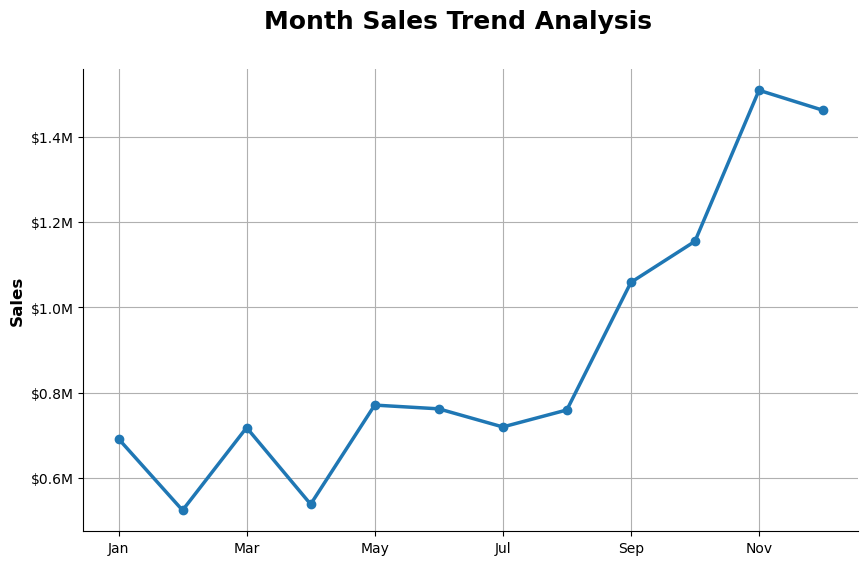

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
monthsales.plot(kind='line', x='Short_Month', y='Total_Sales', linewidth=2.5, marker='o', ax=ax)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1000000}M'))
plt.suptitle('Month Sales Trend Analysis', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.ylabel('Sales', fontsize=12,fontweight='bold')
plt.grid()
ax.get_legend().remove()
sns.despine()


In [30]:
top_countries = df3.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False).head(5)
top_countries

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: Total_Sales, dtype: float64

In [34]:
total = df3['Total_Sales'].sum()
percentage = top_countries / total * 100
percentage.drop(columns='Total')
percentage

Country
United Kingdom    84.611315
Netherlands        2.676055
EIRE               2.657376
Germany            2.145626
France             1.966076
Name: Total_Sales, dtype: float64

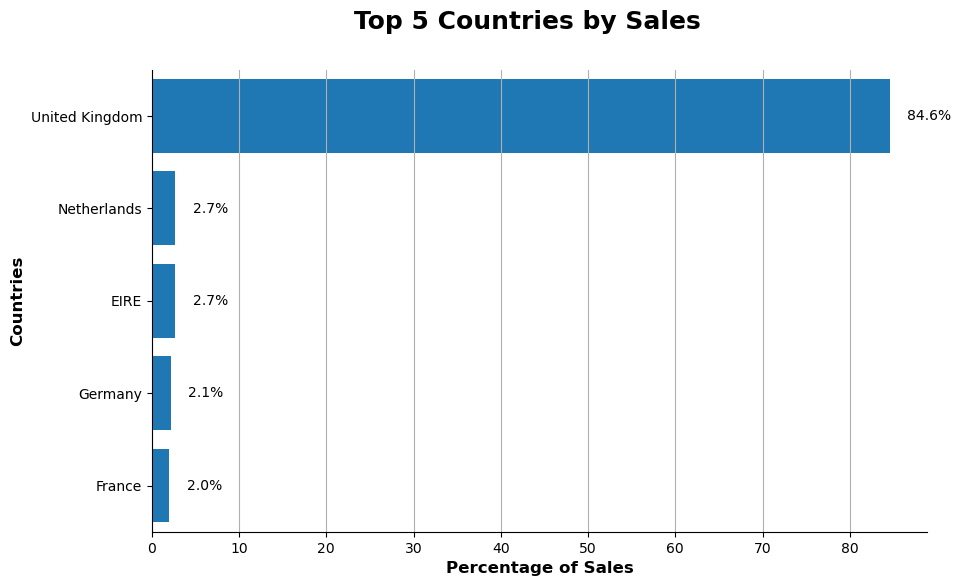

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
percentage.plot(kind='barh', ax=ax)
bars = ax.barh(percentage.index, percentage.values)
ax.invert_yaxis()

for bar, percent in zip(bars, percentage.values):
    ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, f'{percent:.1f}%', va='center')
plt.suptitle('Top 5 Countries by Sales', fontsize=18, fontweight='bold')
plt.xlabel('Percentage of Sales', fontsize=12,fontweight='bold')
plt.ylabel('Countries', fontsize=12,fontweight='bold')
plt.grid(axis='x')
sns.despine()


In [57]:
Top_products = df3.groupby('StockCode')['Total_Sales'].sum().sort_values(ascending=False).head(5)
productper = Top_products / total * 100
productper

StockCode
DOT       1.933579
22423     1.635792
23843     1.579400
85123A    0.979862
47566     0.932852
Name: Total_Sales, dtype: float64

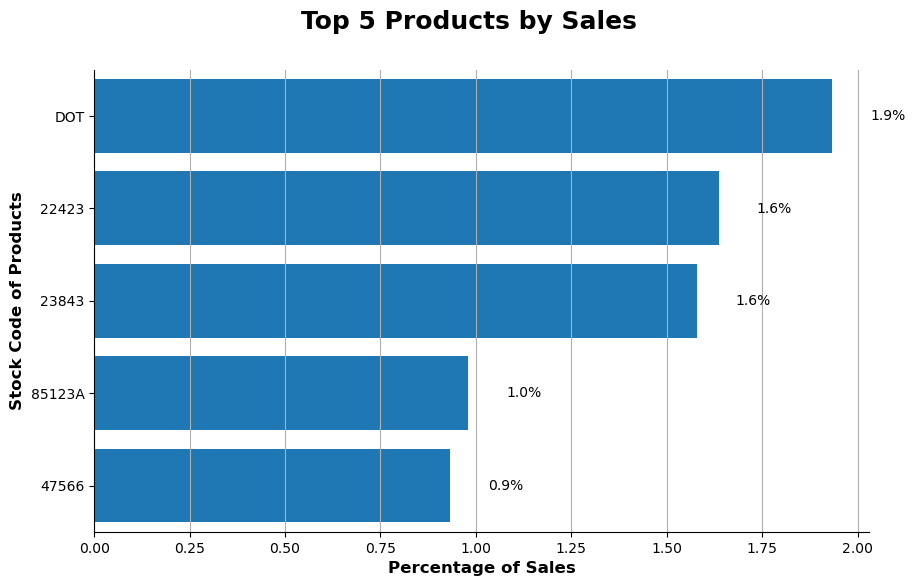

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
productper.plot(kind='barh', ax=ax)
bars1 = ax.barh(productper.index, productper)
ax.invert_yaxis()

for bar, percent in zip(bars1, productper.values):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{percent:.1f}%', va='center')
plt.suptitle('Top 5 Products by Sales', fontsize=18, fontweight='bold')
plt.xlabel('Percentage of Sales', fontsize=12,fontweight='bold')
plt.ylabel('Stock Code of Products', fontsize=12,fontweight='bold')
plt.grid(axis='x')
sns.despine()
